In [2]:
import pandas as pd 
import numpy as np


In [3]:
data=pd.read_csv(r'delivery_time.csv')

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


E:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

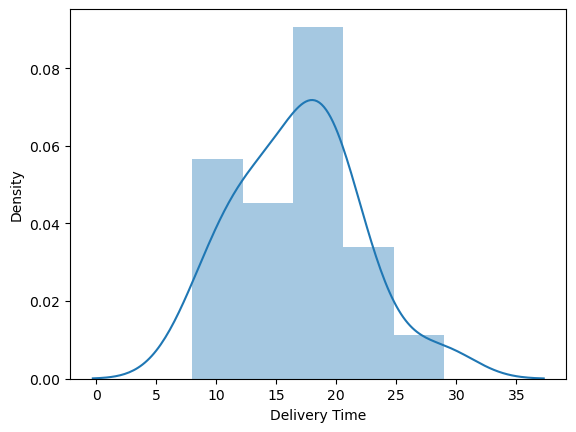

In [7]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

E:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

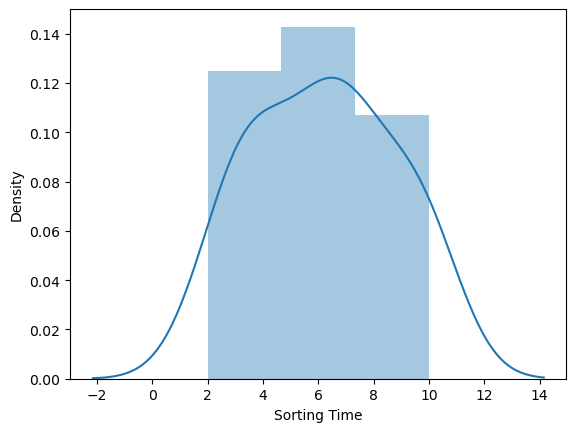

In [8]:
sns.distplot(data['Sorting Time'])

In [9]:
data=data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x233b170e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x233b16f1910>,
 'boxes': [<matplotlib.lines.Line2D at 0x233b170e4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x233b0e95520>],
 'fliers': [<matplotlib.lines.Line2D at 0x233b0e95a90>],
 'means': []}

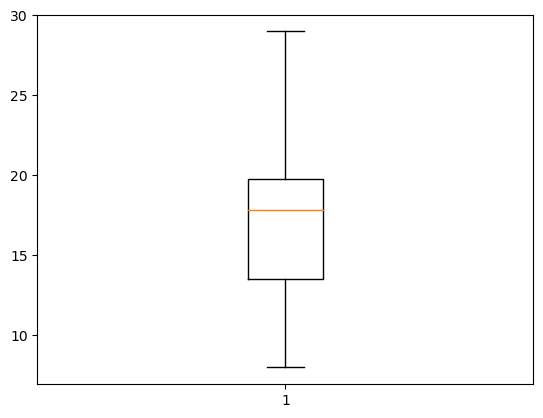

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(data['Delivery_Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x233b16664c0>,
 'caps': [<matplotlib.lines.Line2D at 0x233b1666a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x233b16661c0>],
 'medians': [<matplotlib.lines.Line2D at 0x233b169e040>],
 'fliers': [<matplotlib.lines.Line2D at 0x233b169e310>],
 'means': []}

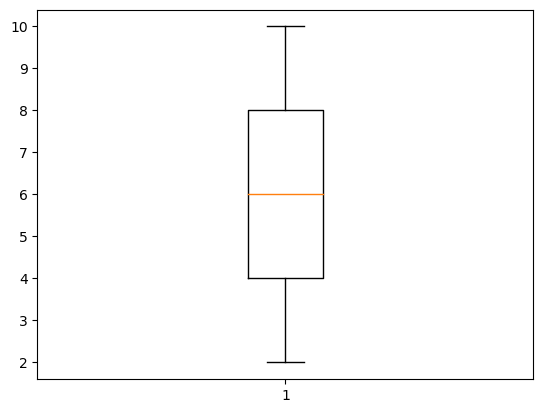

In [12]:
plt.boxplot(data['Sorting_Time'])

E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


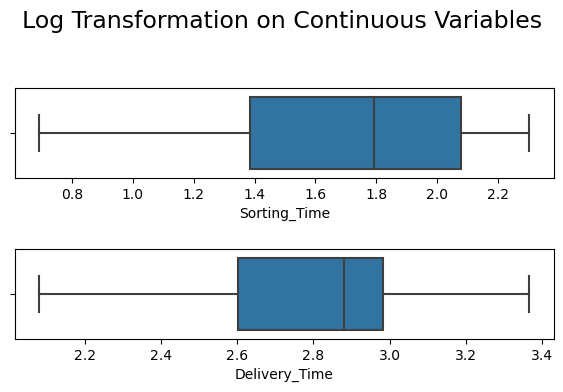

In [15]:
import matplotlib.pyplot as plt 
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.log(data.Sorting_Time), ax=ax[0])
sns.boxplot(np.log(data.Delivery_Time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.0)
plt.tight_layout(pad=2.0)

E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


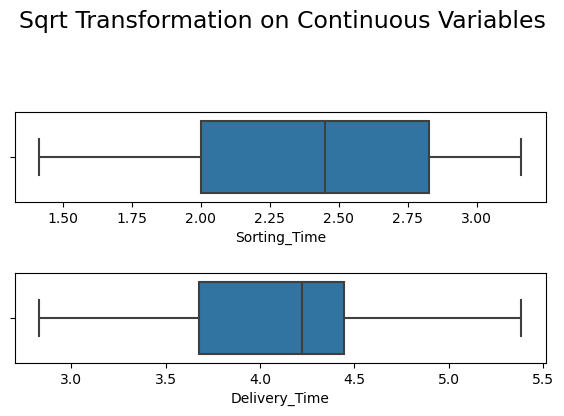

In [16]:

fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(data.Sorting_Time), ax=ax[0])
sns.boxplot(np.sqrt(data.Delivery_Time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [24]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = data).fit()

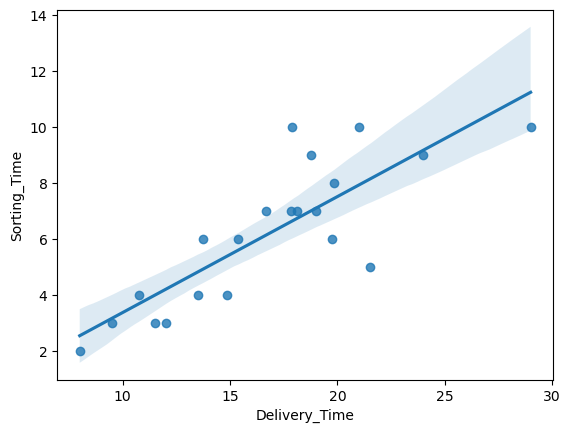

In [26]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data);

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        23:26:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [29]:
print(model.tvalues, '\n', model.pvalues) 

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [30]:
model.rsquared , model.rsquared_adj


(0.6822714748417231, 0.6655489208860244)

In [31]:
newdata=pd.Series([13,15])

In [34]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [35]:
model.predict(data_pred)

0    28.019993
1    31.318032
dtype: float64